
<img src="../assets/logo3.png" width="200" height="200" >
<div style="display:block"><br><br>
    <div style="display:block" align=left display=block> 
        <font size=5><b>HandsOn 5 - Crawling the web with Beautiful Soup</b></font><br>
        <hr/>
</div>


<pre>
$ ( click to jump on task )
.
├── Introduction
│   └── Jupyter hack!!
│
├── Working with Beautiful Soup
│   └── Searching with Beautiful Soup
│ 
├── <a href="#Task1">Task1: Football Table</a> (Morning session)
│
└── <a href="#Task2">Task2: Phone Shop</a> (Afternoon session)

</pre>


The sections marked with a Thinking Emoji (💭) are those which you need to read and answer. All right, without further ado let's get started!

<b><span style="color:Red">You might encounter difficulties sending a Request to Iranian websites using <span style="color:Green">Google Colab</span>. This is because Colab uses a Foreign IP and It gets blocked when trying to access these websites. Please use <span style="color:Green">Jupyter Notebook</span> for this Hands-On exercise. </span></b>

<hr />

# Introduction

In this Hands-On excercise, you will work with these concepts:
- Web Scraping & Data Collection using Requests and Beautiful Soup
- Advanced Data Cleaning using Pandas and Regex

<hr />

### Jupyter hack!! 

Run the code below. Now by clicking TAB when writing code, you get a list of all functions and objects and you can enjoy auto completion. I recommend going wild with this feature and using it always! You can also use SHIFT + TAB in front of any function or variable to see its information.

In [1]:
%config Completer.use_jedi = False

<hr />

# 📖 Working with Beautiful Soup

We can send a GET request to any webpage and get frontend's source code. Raw source code is usually messy and difficult to parse... 

💭 Run the code below to get the source code for https://python.org.

In [2]:
import requests

url = 'https://python.org'
response = requests.get(url)

print(response.encoding)
print(response.apparent_encoding)

print(response.text[:3000])

utf-8
ascii
<!doctype html>
<!--[if lt IE 7]>   <html class="no-js ie6 lt-ie7 lt-ie8 lt-ie9">   <![endif]-->
<!--[if IE 7]>      <html class="no-js ie7 lt-ie8 lt-ie9">          <![endif]-->
<!--[if IE 8]>      <html class="no-js ie8 lt-ie9">                 <![endif]-->
<!--[if gt IE 8]><!--><html class="no-js" lang="en" dir="ltr">  <!--<![endif]-->

<head>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jquery/1.8.2/jquery.min.js">
    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jqueryui/1.12.1/jquery-ui.min.js">

    <meta name="application-name" content="Python.org">
    <meta name="msapplication-tooltip" content="The official home of the Python Programming Language">
    <meta name="apple-mobile-web-app-title" content="Python.org">
    <meta name="apple-mobile-web-app-capable" content="yes">
    <meta name="apple-mobile-web-app-status-bar-style" content="black">

    

The response is in the form of a very long string! It's difficult to access each HTML tag and attribute like this. The string is very messy as well...

<hr />

All you need is a <b><span style="color:green">beautiful soup</span></b>! 

<b><span style="color:green">Beautiful soup</span></b> is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. It commonly saves programmers hours or days of work.

💭 Please install it in your conda environment: <br>

<code> !conda install -y -c anaconda beautifulsoup4 </code>

In [3]:
'''
You can install beautiful soup here
'''

'\nYou can install beautiful soup here\n'

💭 Now run the code below:

In [4]:
from bs4 import BeautifulSoup

# beautiful soup takes the source code and a parser as input
soup = BeautifulSoup(response.text, 'html.parser')

print(soup)

<!DOCTYPE html>

<!--[if lt IE 7]>   <html class="no-js ie6 lt-ie7 lt-ie8 lt-ie9">   <![endif]-->
<!--[if IE 7]>      <html class="no-js ie7 lt-ie8 lt-ie9">          <![endif]-->
<!--[if IE 8]>      <html class="no-js ie8 lt-ie9">                 <![endif]-->
<!--[if gt IE 8]><!--><html class="no-js" dir="ltr" lang="en"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<link href="//ajax.googleapis.com/ajax/libs/jquery/1.8.2/jquery.min.js" rel="prefetch"/>
<link href="//ajax.googleapis.com/ajax/libs/jqueryui/1.12.1/jquery-ui.min.js" rel="prefetch"/>
<meta content="Python.org" name="application-name"/>
<meta content="The official home of the Python Programming Language" name="msapplication-tooltip"/>
<meta content="Python.org" name="apple-mobile-web-app-title"/>
<meta content="yes" name="apple-mobile-web-app-capable"/>
<meta content="black" name="apple-mobile-web-app-status-bar-style"/>
<meta content="width=device-width, initial-scal

The data looks much prettier now. <b><span style="color:green">Beautiful Soup</span></b> detects all HTML tags, so we can access these tags by using its built in functions!

### 📖 But what are these "HTML tags" anyway?
These HTML tags are exactly what you see when you press <b>F12</b> on a webpage. Everything that you see as a user inside a website is associated with one of these tags. If you don't believe me, right click on any element in a webpage and click on the <b>Inspect Element</b> botton. You will see which tag the element you clicked on belongs to! 

<img src="../assets/day5-handson-im.png" height="200" >

#### 💭 try it for yourself! 
Visit <b>www.python.org</b>, right click on the <b>Community</b> botton, then click on the <b>Inspect Element</b> botton. It should look like the figure above:


We can see that this element belongs to an <b><a\></b> tag inside another <b><li\></b> tag. In HTML, <b><a\> </b> tag defines a hyperlink and <b><li\></b> tag defines an item in a list. Each tag has some attributes. For example, the <b><a\></b> tag here has a link (href) and a text value ('Community').
<hr />

### 📖 Searching with Beautiful Soup

<b><span style="color:green">Beautiful soup</span></b> allows you to search through the source code by tag names and their attributes. The code below finds the first <b><a\></b> tag in python.org which satisfies the given conditions.
    
💭 try it for yourself!

In [5]:
# Can add any attributes we want to the function

print(soup.find('a', href="/community-landing/"))

<a href="/community-landing/">Community</a>


💭 Notice that there are sometimes many ways to search for the same tag:

In [6]:
print(soup.find('a', href="#content"))

<a href="#content" title="Skip to content">Skip to content</a>


In [7]:
print(soup.find('a', text="Skip to content"))

<a href="#content" title="Skip to content">Skip to content</a>


<hr />

#### 📖 What if we need to find every element that satisfies a condition?

💭 Run the code below to find every <b> <a\> </b> tag that exists in python.org!

In [8]:
a = soup.findAll('a')
a

[<a href="#content" title="Skip to content">Skip to content</a>,
 <a aria-hidden="true" class="jump-link" href="#python-network" id="close-python-network">
 <span aria-hidden="true" class="icon-arrow-down"><span>▼</span></span> Close
                 </a>,
 <a class="current_item selectedcurrent_branch selected" href="/" title="The Python Programming Language">Python</a>,
 <a href="/psf-landing/" title="The Python Software Foundation">PSF</a>,
 <a href="https://docs.python.org" title="Python Documentation">Docs</a>,
 <a href="https://pypi.org/" title="Python Package Index">PyPI</a>,
 <a href="/jobs/" title="Python Job Board">Jobs</a>,
 <a href="/community-landing/">Community</a>,
 <a aria-hidden="true" class="jump-link" href="#top" id="python-network">
 <span aria-hidden="true" class="icon-arrow-up"><span>▲</span></span> The Python Network
                 </a>,
 <a href="/"><img alt="python™" class="python-logo" src="/static/img/python-logo.png"/></a>,
 <a class="donate-button" href="

<hr />

#### 📖 What if we want to access the attributes of all those tags? 
Just imagine if the search result was a dictionary!

💭 Run the code below to extract the links (href).

In [9]:
type(a)

bs4.element.ResultSet

In [10]:
for i in a:
    print(i['href'])

#content
#python-network
/
/psf-landing/
https://docs.python.org
https://pypi.org/
/jobs/
/community-landing/
#top
/
https://psfmember.org/civicrm/contribute/transact?reset=1&id=2
#site-map
#
javascript:;
javascript:;
javascript:;
#
https://www.facebook.com/pythonlang?fref=ts
https://twitter.com/ThePSF
/community/irc/
/about/
/about/apps/
/about/quotes/
/about/gettingstarted/
/about/help/
http://brochure.getpython.info/
/downloads/
/downloads/
/downloads/source/
/downloads/windows/
/downloads/macos/
/download/other/
https://docs.python.org/3/license.html
/download/alternatives
/doc/
/doc/
/doc/av
https://wiki.python.org/moin/BeginnersGuide
https://devguide.python.org/
https://docs.python.org/faq/
http://wiki.python.org/moin/Languages
http://python.org/dev/peps/
https://wiki.python.org/moin/PythonBooks
/doc/essays/
/community/
/community/diversity/
/community/lists/
/community/irc/
/community/forums/
/psf/annual-report/2021/
/community/workshops/
/community/sigs/
/community/logos/
https

<hr />

#### 📖 Fancier functions
 There are two other functions, ```select_one``` and ```select``` that work in a similar fashion to ```find``` and ```findAll```, but these functions are more powerful. They allow defining complex conditions by <b><span style="color:green">CSS</span></b> syntax!

Below you can see some examples for <b><span style="color:green">CSS</span></b> syntax. (Check out the documentation for more awesome tricks!)

- a > b: I want an <a\> tag that is inside a <b\> tag
- c#d: I want a <c\> tag with its 'id' attribute equal to 'c'
- e.f: I want an <e\> tag with its 'class' attribute equal to 'd'

💭 Run the code below. It finds <b>the first</b> <div\> with id='nojs' which is inside another <div\>. 

In [11]:
show = soup.select_one('div > div#nojs')
show

<div class="do-not-print" id="nojs">
<p><strong>Notice:</strong> While JavaScript is not essential for this website, your interaction with the content will be limited. Please turn JavaScript on for the full experience. </p>
</div>

What if we want to access the text of this tag?

In [12]:
show.text

'\nNotice: While JavaScript is not essential for this website, your interaction with the content will be limited. Please turn JavaScript on for the full experience. \n'

 💭 Run the code below. It finds <b>all</b> <div\>s with class='do-not-print' inside another <div\>.

In [13]:
show = soup.select('div > div.do-not-print')
show

[<div class="do-not-print" id="nojs">
 <p><strong>Notice:</strong> While JavaScript is not essential for this website, your interaction with the content will be limited. Please turn JavaScript on for the full experience. </p>
 </div>,
 <div class="top-bar do-not-print" id="top">
 <nav class="meta-navigation container" role="navigation">
 <div class="skip-link screen-reader-text">
 <a href="#content" title="Skip to content">Skip to content</a>
 </div>
 <a aria-hidden="true" class="jump-link" href="#python-network" id="close-python-network">
 <span aria-hidden="true" class="icon-arrow-down"><span>▼</span></span> Close
                 </a>
 <ul class="menu" role="tree">
 <li class="python-meta current_item selectedcurrent_branch selected">
 <a class="current_item selectedcurrent_branch selected" href="/" title="The Python Programming Language">Python</a>
 </li>
 <li class="psf-meta">
 <a href="/psf-landing/" title="The Python Software Foundation">PSF</a>
 </li>
 <li class="docs-meta">
 <

<hr />

## 💭💭💭Task 1: Football table💭💭💭

<a name="Task1"></a>

The goal of this exercise is to familiarize you more with Inspecting HTML source codes by extracting information from a static table in varzesh3.com.

💭 Please visit this <b>[link](https://www.varzesh3.com/football/league/900578/%D9%84%DB%8C%DA%AF-%D8%A8%D8%B1%D8%AA%D8%B1-%D8%A7%DB%8C%D8%B1%D8%A7%D9%86-1400-1401)</b> and look at the table. It's the data for Iran's football league (1400-1401).

💭 Run the code below to load the table.

<b><span style="color:red">When working with Persian letters, sometimes <b><span style="color:green">requests</span></b> can get the encoding wrong and show strange characters. If this happens, restart the kernel and run the code below again.</span></b>


In [14]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.varzesh3.com/football/league/900578/%D9%84%DB%8C%DA%AF-%D8%A8%D8%B1%D8%AA%D8%B1-%D8%A7%DB%8C%D8%B1%D8%A7%D9%86-1400-1401'

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find('table')
table 

<table class="league-standing football-standing">
<caption>لیگ برتر ایران 1400-1401</caption>
<thead>
<tr>
<th scope="col">رتبه</th>
<th scope="col"></th>
<th scope="col">بازی</th>
<th scope="col">برد</th>
<th scope="col">مساوی</th>
<th scope="col">باخت</th>
<th scope="col"> گل -/+</th>
<th scope="col">تفاضل </th>
<th scope="col">امتياز</th>
<th class="last-five" scope="col">5 بازی آخر  <img src="https://static.varzesh3.com/img/icons/last-five-arrow.svg"/> </th>
</tr>
</thead>
<tbody>
<tr>
<td><span class="standing-rule-color" style="background: #0f40d2"></span>1</td>
<td scope="row">
<a href="/football/team/4/استقلال">
<figure>
<img alt="استقلال" src="https://static.farakav.com/files/pictures/01150467.png?w=30" width="30"/>
</figure>
                                استقلال 
                            </a>
</td>
<td>30</td>
<td>19</td>
<td>11</td>
<td>0</td>
<td>39-10</td>
<td>29</td>
<td>68</td>
<td class="last-five">
<a href="/football/match/172336">
<span class="ls-results ls-win">

💭 By inspecting the tag names in the webpage youre trying to crawl, give a short description of what each represent:

 - ```<thead>```: 
 - ```<tr>```:
 - ```<th>```:
 - ```<tbody>```:
 - ```<td>```:

<hr />

💭 Explain briefly what this code is doing. What should the missing value stand for?

....

In [15]:
rows = table.find_all('tr')
for row in rows:
    for head in row.find_all('th'):
        print([head.text])

['رتبه']
['']
['بازی']
['برد']
['مساوی']
['باخت']
[' گل -/+']
['تفاضل ']
['امتياز']
['5 بازی آخر   ']


<hr />

💭 Explain briefly what this code is doing. 

...

In [16]:
for row in rows:        
    for body in row.find_all('td'):
        print([body.text])

['1']
['\n\n\n\n\r\n                                استقلال \r\n                            \n']
['30']
['19']
['11']
['0']
['39-10']
['29']
['68']
['\n\n✔\n\n\n✔\n\n\n ― \n\n\n✔\n\n\n ― \n\n']
['2']
['\n\n\n\n\r\n                                پرسپولیس \r\n                            \n']
['30']
['18']
['9']
['3']
['44-21']
['23']
['63']
['\n\n✔\n\n\n ― \n\n\n✖\n\n\n✔\n\n\n✔\n\n']
['3']
['\n\n\n\n\r\n                                سپاهان \r\n                            \n']
['30']
['16']
['8']
['6']
['43-21']
['22']
['56']
['\n\n✔\n\n\n✔\n\n\n✔\n\n\n✖\n\n\n ― \n\n']
['4']
['\n\n\n\n\r\n                                گل گهرسیرجان \r\n                            \n']
['30']
['13']
['12']
['5']
['37-28']
['9']
['51']
['\n\n✔\n\n\n✔\n\n\n✔\n\n\n✔\n\n\n✔\n\n']
['5']
['\n\n\n\n\r\n                                فولاد \r\n                            \n']
['30']
['13']
['10']
['7']
['30-22']
['8']
['49']
['\n\n✔\n\n\n✖\n\n\n✔\n\n\n✔\n\n\n ― \n\n']
['6']
['\n\n\n\n\r\n                     

<hr />

📖 As you see, some of the lines have extra spacings, or extra characters like "\n", "\r" or extra spaces. We can use ```replace('a', 'b')``` function on any string to deal with these. 

💭 Use the aforementioned function to remove these extra characters from the table in the code below.

In [17]:
import re

In [18]:
rows = table.find_all('tr')

datas = []

for row in rows:
    data = []
    for head in row.find_all('th'):
        h = head.text
        
        h = re.sub(r'^\s+|^\n+\s+|\r\n\s+|\s+$', '', h)


        data.append(h)
    for body in row.find_all('td'):
        b = body.text
        
        b = re.sub(r'^\s+|\n+\s+|\r\n\s+|\s+$', '', b)
        
        data.append(b)
    datas.append(data)

datas

[['رتبه',
  '',
  'بازی',
  'برد',
  'مساوی',
  'باخت',
  'گل -/+',
  'تفاضل',
  'امتياز',
  '5 بازی آخر'],
 ['1', 'استقلال', '30', '19', '11', '0', '39-10', '29', '68', '✔✔― ✔―'],
 ['2', 'پرسپولیس', '30', '18', '9', '3', '44-21', '23', '63', '✔― ✖✔✔'],
 ['3', 'سپاهان', '30', '16', '8', '6', '43-21', '22', '56', '✔✔✔✖―'],
 ['4', 'گل گهرسیرجان', '30', '13', '12', '5', '37-28', '9', '51', '✔✔✔✔✔'],
 ['5', 'فولاد', '30', '13', '10', '7', '30-22', '8', '49', '✔✖✔✔―'],
 ['6', 'مس رفسنجان', '30', '12', '9', '9', '39-29', '10', '45', '✔✖✔✖―'],
 ['7', 'ذوب آهن', '30', '10', '7', '13', '21-25', '-4', '37', '― ― ✔― ✖'],
 ['8', 'آلومینیوم اراک', '30', '7', '16', '7', '20-23', '-3', '37', '✖✔― ― ―'],
 ['9', 'پیکان', '30', '7', '15', '8', '26-27', '-1', '36', '✖― ✖― ―'],
 ['10',
  'صنعت نفت آبادان',
  '30',
  '9',
  '9',
  '12',
  '26-30',
  '-4',
  '36',
  '― ✖✖✖―'],
 ['11', 'هوادار', '30', '8', '10', '12', '18-25', '-7', '34', '✔✖✔✖✖'],
 ['12',
  'نساجی مازندران',
  '30',
  '6',
  '15',
  '9',
  

<hr />

💭 Convert ```datas``` to a pandas DataFrame with proper column names & no empty rows or columns

In [57]:
import pandas as pd
import numpy as np

''' Enter your code here'''

datas[0][1] = 'تیم'
datas = np.array(datas)

df = pd.DataFrame(dict([(datas[0, i], datas[1:, i]) for i in range(datas.shape[1])]))




<hr />

💭 Run these 2 code blocks

In [41]:
df.head()

,رتبه,تیم,بازی,برد,مساوی,باخت,گل -/+,تفاضل,امتياز,5 بازی آخر
0,1,استقلال,30,19,11,0,39-10,29,68,✔✔― ✔―
1,2,پرسپولیس,30,18,9,3,44-21,23,63,✔― ✖✔✔
2,3,سپاهان,30,16,8,6,43-21,22,56,✔✔✔✖―
3,4,گل گهرسیرجان,30,13,12,5,37-28,9,51,✔✔✔✔✔
4,5,فولاد,30,13,10,7,30-22,8,49,✔✖✔✔―


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   رتبه        16 non-null     object
 1   تیم         16 non-null     object
 2   بازی        16 non-null     object
 3   برد         16 non-null     object
 4   مساوی       16 non-null     object
 5   باخت        16 non-null     object
 6   گل -/+      16 non-null     object
 7   تفاضل       16 non-null     object
 8   امتياز      16 non-null     object
 9   5 بازی آخر  16 non-null     object
dtypes: object(10)
memory usage: 1.4+ KB


<hr />

💭 Create Two Columns for GS (Goals Scored) and GA (Goals Against) 
(همون گل زده و گل خورده خودمون)

In [58]:
''' Enter your code here'''
df['گل زده'] = df.apply(lambda x: int(x['گل -/+'].split('-')[0]), axis=1)
df['گل خورده'] = df.apply(lambda x: int(x['گل -/+'].split('-')[1]), axis=1)
df.head()

,رتبه,تیم,بازی,برد,مساوی,باخت,گل -/+,تفاضل,امتياز,5 بازی آخر,گل زده,گل خورده
0,1,استقلال,30,19,11,0,39-10,29,68,✔✔― ✔―,39,10
1,2,پرسپولیس,30,18,9,3,44-21,23,63,✔― ✖✔✔,44,21
2,3,سپاهان,30,16,8,6,43-21,22,56,✔✔✔✖―,43,21
3,4,گل گهرسیرجان,30,13,12,5,37-28,9,51,✔✔✔✔✔,37,28
4,5,فولاد,30,13,10,7,30-22,8,49,✔✖✔✔―,30,22


<hr />

💭 Which team has most losses?

In [59]:
''' Enter your code here'''
df['باخت'] = pd.to_numeric(df['باخت'])
df.nlargest(1, 'باخت')

,رتبه,تیم,بازی,برد,مساوی,باخت,گل -/+,تفاضل,امتياز,5 بازی آخر,گل زده,گل خورده
14,15,شهرخودرو مشهد,30,2,11,17,17-43,-26,17,✖― ✖✖―,17,43


<hr />


💭 Which team has most goal difference? (Difference between the GS and GA) 

In [60]:
''' Enter your code here'''
df['تفاضل'] = pd.to_numeric(df['تفاضل'])
df.nlargest(1, 'تفاضل')

,رتبه,تیم,بازی,برد,مساوی,باخت,گل -/+,تفاضل,امتياز,5 بازی آخر,گل زده,گل خورده
0,1,استقلال,30,19,11,0,39-10,29,68,✔✔― ✔―,39,10


<hr />


💭 which team was the best during last 3 games? (Use the column with the ✔s)

In [68]:
''' Enter your code here'''
df['برد در 3 بازی آخر'] = df.apply(lambda x: x['5 بازی آخر'][2:].count('✔'), axis=1)
df.nlargest(1, 'برد در 3 بازی آخر')

,رتبه,تیم,بازی,برد,مساوی,باخت,گل -/+,تفاضل,امتياز,5 بازی آخر,گل زده,گل خورده,برد در 3 بازی آخر
3,4,گل گهرسیرجان,30,13,12,5,37-28,9,51,✔✔✔✔✔,37,28,3


 <hr />
The code snippet below can be used to display Persian and Arabic strings beautifully when plotting in Python. 

- Please add the package ```arabic_reshaper``` by this command: ```!conda install -c conda-forge arabic_reshaper```
- Please add the package ```bidi``` by this command: ```!conda install -c conda-forge python-bidi```

In [72]:
'''
You can install the packages here
'''
!pip install arabic_reshaper
!pip install python-bidi

In [71]:
# The code 
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display
def reshaper(text_list):
    for i in range(len(text_list)):
        text_list[i] = get_display(arabic_reshaper.reshape(u'%s' %str(text_list[i])))
    return text_list

 💭 Plot Total Scores and The Scores of the last 3 games in one single bar plot. Please use the code snippet above for displaying the team names.
 (Your answer should look like the provided figure)


In [160]:
df['امتياز'] = pd.to_numeric(df['امتياز'])
df['امتیاز 3 بازی آخر'] = df.apply(lambda x: 3 * x['5 بازی آخر'][2:].count('✔') + x['5 بازی آخر'][2:].count('―'), axis=1)

In [161]:
df.head()

,رتبه,تیم,بازی,برد,مساوی,باخت,گل -/+,تفاضل,امتياز,5 بازی آخر,گل زده,گل خورده,برد در 3 بازی آخر,امتیاز 3 بازی آخر
0,1,ﻝﻼﻘﺘﺳﺍ,30,19,11,0,39-10,29,68,✔✔― ✔―,39,10,1,5
1,2,ﺲﯿﻟﻮﭙﺳﺮﭘ,30,18,9,3,44-21,23,63,✔― ✖✔✔,44,21,2,6
2,3,ﻥﺎﻫﺎﭙﺳ,30,16,8,6,43-21,22,56,✔✔✔✖―,43,21,1,4
3,4,ﻥﺎﺟﺮﯿﺳﺮﻬﮔ ﻞﮔ,30,13,12,5,37-28,9,51,✔✔✔✔✔,37,28,3,9
4,5,ﺩﻻﻮﻓ,30,13,10,7,30-22,8,49,✔✖✔✔―,30,22,2,7


/var/folders/22/1gdchc0s1zv4lr78srz6vdd80000gn/T/ipykernel_80995/492398937.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_list[i] = get_display(arabic_reshaper.reshape(u'%s' %str(text_list[i])))


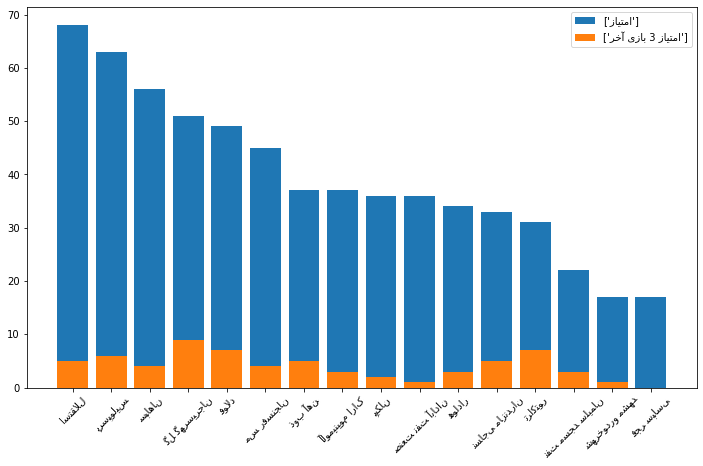

In [162]:
''' Enter your code here'''

fig = plt.figure(figsize=(12, 7))
x = reshaper(df['تیم'])
plt.bar(x, df['امتياز'], label=reshaper(['امتیاز']))
plt.bar(x, df['امتیاز 3 بازی آخر'], label=reshaper(['امتیاز 3 بازی آخر']))
plt.xticks(rotation=45)
plt.legend()
plt.show()

<hr />
<hr />
<hr />
<hr />
<hr />
<hr />
<hr />
<hr />
<hr />
<hr />
<hr />
<hr />
<hr />

## 💭💭💭Task 2: Phone Shop💭💭💭

<a name="Task2"></a>

📖 Now let's search for a nice new phone in <b>technolife</b> by crawling it. :) <br />
Below you can see the URL of the first page in the phone section <br />
https://www.technolife.ir/product/list/69_800_801/%D8%AA%D9%85%D8%A7%D9%85%DB%8C-%DA%AF%D9%88%D8%B4%DB%8C%E2%80%8C%D9%87%D8%A7?code=69_800_801&plp=%D8%AA%D9%85%D8%A7%D9%85%DB%8C-%DA%AF%D9%88%D8%B4%DB%8C%E2%80%8C%D9%87%D8%A7&page=1

<b>Notes</b>
- if we want to crawl laptops from all pages, we should change the URL accordingly (For example, ```page=1``` should change to ```page=2```.
In this example, we want to crawl the first 10 pages.
- Crawling 10 pages might take a while to finish, so begin with just a few pages and increase the number when you're sure about your code. Using ```tqdm``` library helps by showing a progress bar! install it with ```pip``` or ```conda``` before running the code below.


In [101]:
'''
You can install tqdm here
'''
!pip install tqdm


### 💭 Crawling and saving the info
💭 Open the URL above and Inspect the web page and their elements like title, price , ... to familiarize yourself with them.

<hr />
💭 Complete the crawling code below...



<b>Notes:</b> Please apply no preprocessing or data cleaning! <b>Just save the raw data</b>. You can also change the pages by manipulating the URL in the ```For``` loop below. Your results should look like the table provided in the output cell below.

In [122]:
import requests
from bs4 import BeautifulSoup 
import pandas as pd
from tqdm import tqdm

url = 'https://www.technolife.ir/product/list/69_800_801/%D8%AA%D9%85%D8%A7%D9%85%DB%8C-%DA%AF%D9%88%D8%B4%DB%8C%E2%80%8C%D9%87%D8%A7?code=69_800_801&plp=%D8%AA%D9%85%D8%A7%D9%85%DB%8C-%DA%AF%D9%88%D8%B4%DB%8C%E2%80%8C%D9%87%D8%A7&page='

result = []

for page in tqdm(range(1, 10)):
    
    '''' Enter your code here to Change the URL page '''
    new_url = url + str(page)
    
    page = requests.get(new_url)
    soup = BeautifulSoup(page.text, 'html.parser')
    
    # Get product list
    products = soup.select('div#productsList>ul>li')
    for p in products:
        # Get product title
        title = p.select('a.ProductComp_product_title__bOrf5>strong')[0].text

        # Get product price
        price = p.select('section.ProductComp_product_price__S4_x8 span')[0].text

        offer_section = p.select_one('div.ProductComp_product_off_box__OfLBa')
        
        if not offer_section:
            # there is no offer for this product (main price)
            main_price = p.select_one('section.ProductComp_product_price__S4_x8>div.ProductComp_main_price__XgWce')
            price = main_price.select('span')[0].text
        else:
            # there is offer for this product (offer price)
            '''' Enter your code here to extract product offer price '''
            offer_price = p.select_one('section.ProductComp_product_price__S4_x8>div.ProductComp_offer_price__HAQ6N')
            price = offer_price.select('span')[0].text
        
        # Get product specs (hard disk/screen size/camera/battery)
        '''' Enter your code here to extract product specs '''
        specs = p.select('div.ProductComp_product_icon__OLqA5>ul.pr_icon>li>span')
        hard_disk = specs[1].text
        size = specs[3].text
        camera = specs[5].text
        battery = specs[7].text
        
        result.append({
            'title': title,
            'hard disk': hard_disk,
            'size': size,
            'camera': camera,
            'battery': battery,
            'price': price
        })


# Saving dictionary in a dataframe
data = pd.DataFrame(result)
data

100%|██████████| 9/9 [00:54<00:00,  6.03s/it]


,title,hard disk,size,camera,battery,price
0,گوشی موبايل سامسونگ مدل Galaxy A12 Nacho ظرفیت...,64,6.5,48,5000,"4,499,000"
1,گوشی موبايل سامسونگ مدل گلکسی A32 4G دو سیم کا...,128,6.4,64,5000,"6,199,000"
2,گوشی موبايل نوکيا مدل 105 (2019) ظرفیت 4 مگابا...,4,1.77,,800,"635,000"
3,گوشی موبایل سامسونگ مدل Galaxy A13 ظرفیت 64 ...,64,6.6,50,5000,"4,555,000"
4,گوشی موبايل سامسونگ مدل Galaxy A52s 5G ظرفیت 2...,256,6.5,64,4500,"11,899,000"
...,...,...,...,...,...,...
283,گوشی موبايل سامسونگ مدل گلکسی A53 5G ظرفیت 256...,256,6.46,64,5000,"11,399,000"
284,گوشی موبايل نوکيا مدل 5310 (2020),16,2.4,VGA,1200,"1,389,000"
285,گوشی موبایل شیائومی مدل 11T 5G - ظرفیت 256 گیگ...,256,6.67,108,5000,"11,115,000"
286,گوشی موبایل نوکیا G20 ظرفیت 128 گیگابایت - رم ...,128,6.52,48,5050,"4,355,000"


In [129]:
data = pd.DataFrame(result)

<hr />

### 💭 Clean the pandas dataframe
<a name="Task2:clean"></a>

 - Fix data types
   - `hard disk` -> `int`
   - `size` -> `float`
   - `camera` -> `float`
   - `battery` -> `int`
   - `price` -> `int`
 - Normalize Arabic characters
 - Extract RAM inforamtion. (Use Regex)
 - Clean `title` column
   - Remove redundant words (e.g. گوشی)
   - Remove parts related to RAM/Storage information
   - Remove non-word characters (e.g. -)
 
 You can play around with your <b><span style="color:green">Regex</span></b> patterns <b>[here](https://regexr.com/)</b>

In [130]:
# Fix data types
import locale

data['camera'] = data['camera'].replace(['VGA', ''], 0)

'''Convert these datatypes'''
data['camera'] = data.camera.astype(float)
data['battery'] = data.battery.astype(int)
data['hard disk'] = data['hard disk'].astype(int)
data['size'] = data.size.astype(float)

'''Convert price (It needs a little more work)'''
data['price'] = data.price.replace({',':''},regex=True).apply(pd.to_numeric,1)

In [132]:
# Normalize Arabic characters

def normalize_char(txt):
    txt = txt.replace('ك', 'ک')
    txt = txt.replace('دِ', 'د')
    txt = txt.replace('زِ', 'ز')
    txt = txt.replace('ذِ', 'ذ')
    txt = txt.replace('شِ', 'ش')
    txt = txt.replace('سِ', 'س')
    txt = txt.replace('ى', 'ی')
    txt = txt.replace('ي', 'ی')
    return txt

data['title'] = data['title'].apply(normalize_char)

In [152]:
# Extract RAM

def extract_ram(title):
    try:
        ram, unit = re.findall(r'رم (\d+) (مگابایت|گیگابایت)', title)[0]
    except IndexError:
        return 0
    ram = int(ram) * 1024 if unit == 'گیگابایت' else int(ram)
    return ram

    

data['ram'] = data.title.apply(extract_ram)
data.ram

0      4096
1      6144
2         4
3      4096
4      8192
       ... 
283    8192
284       0
285    8192
286    4096
287    6144
Name: ram, Length: 288, dtype: int64

In [155]:
data.head()

,title,hard disk,size,camera,battery,price,ram
0,گوشی موبایل سامسونگ مدل Galaxy A12 Nacho ظرفیت...,64,1728.0,48.0,5000,4499000,4096
1,گوشی موبایل سامسونگ مدل گلکسی A32 4G دو سیم کا...,128,1728.0,64.0,5000,6199000,6144
2,گوشی موبایل نوکیا مدل 105 (2019) ظرفیت 4 مگابا...,4,1728.0,0.0,800,635000,4
3,گوشی موبایل سامسونگ مدل Galaxy A13 ظرفیت 64 ...,64,1728.0,50.0,5000,4555000,4096
4,گوشی موبایل سامسونگ مدل Galaxy A52s 5G ظرفیت 2...,256,1728.0,64.0,4500,11899000,8192


In [166]:
# Clean title
def clean_title(title):
    return re.sub(r'\s*گوشی\s*|\s*موبایل\s*|رم \d+ (مگابایت|گیگابایت)|\s*-\s*|ظرفیت \d* (مگابایت|گیگابایت)', '', title).strip()

data.title = data.title.apply(clean_title)
data.head()

,title,hard disk,size,camera,battery,price,ram
0,سامسونگ مدل Galaxy A12 Nacho,64,1728.0,48.0,5000,4499000,4096
1,سامسونگ مدل گلکسی A32 4G دو سیم کارت,128,1728.0,64.0,5000,6199000,6144
2,نوکیا مدل 105 (2019),4,1728.0,0.0,800,635000,4
3,سامسونگ مدل Galaxy A13,64,1728.0,50.0,5000,4555000,4096
4,سامسونگ مدل Galaxy A52s 5G,256,1728.0,64.0,4500,11899000,8192


<hr />

💭 Run these 2 code blocks at the end of your task

In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      288 non-null    object 
 1   hard disk  288 non-null    int64  
 2   size       288 non-null    float64
 3   camera     288 non-null    float64
 4   battery    288 non-null    int64  
 5   price      288 non-null    int64  
 6   ram        288 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 15.9+ KB


In [168]:
data

,title,hard disk,size,camera,battery,price,ram
0,سامسونگ مدل Galaxy A12 Nacho,64,1728.0,48.00,5000,4499000,4096
1,سامسونگ مدل گلکسی A32 4G دو سیم کارت,128,1728.0,64.00,5000,6199000,6144
2,نوکیا مدل 105 (2019),4,1728.0,0.00,800,635000,4
3,سامسونگ مدل Galaxy A13,64,1728.0,50.00,5000,4555000,4096
4,سامسونگ مدل Galaxy A52s 5G,256,1728.0,64.00,4500,11899000,8192
...,...,...,...,...,...,...,...
283,سامسونگ مدل گلکسی A53 5G,256,1728.0,64.00,5000,11399000,8192
284,نوکیا مدل 5310 (2020),16,1728.0,0.00,1200,1389000,0
285,شیائومی مدل 11T 5G,256,1728.0,108.00,5000,11115000,8192
286,نوکیا G20,128,1728.0,48.00,5050,4355000,4096


<hr />

### 💭Learn more about the data

Good job so far. Now let's gain some insights from the data we crawled!

<a name="Task2:clean"></a>

💭 Show me all Samsung (سامسونگ) phones that have a 128GB hard disk.

In [171]:
data['hard disk']

0       64
1      128
2        4
3       64
4      256
      ... 
283    256
284     16
285    256
286    128
287     64
Name: hard disk, Length: 288, dtype: int64

In [173]:
'''Enter your code here'''
data[(data.title.str.contains('سامسونگ')) & (data['hard disk'] == 128)]

,title,hard disk,size,camera,battery,price,ram
1,سامسونگ مدل گلکسی A32 4G دو سیم کارت,128,1728.0,64.0,5000,6199000,6144
21,سامسونگ مدل Galaxy A52,128,1728.0,64.0,4500,8129000,8192
23,سامسونگ مدل Galaxy A22 5G,128,1728.0,48.0,5000,5239000,4096
25,سامسونگ مدل Galaxy A13,128,1728.0,50.0,5000,4999000,4096
33,سامسونگ مدل گلکسی A32 4G دو سیم کارت,128,1728.0,64.0,5000,6199000,6144
53,سامسونگ مدل Galaxy A52,128,1728.0,64.0,4500,8129000,8192
55,سامسونگ مدل Galaxy A22 5G,128,1728.0,48.0,5000,5239000,4096
57,سامسونگ مدل Galaxy A13,128,1728.0,50.0,5000,4999000,4096
65,سامسونگ مدل گلکسی A32 4G دو سیم کارت,128,1728.0,64.0,5000,6199000,6144
85,سامسونگ مدل Galaxy A52,128,1728.0,64.0,4500,8129000,8192


<hr />

💭 Show me the phone with most battery capacity.

In [174]:
'''Enter your code here'''
data.nlargest(1, 'battery')

,title,hard disk,size,camera,battery,price,ram
30,نوکیا G20,128,1728.0,48.0,5050,4355000,4096


<hr />

💭 Categorize `price` column into below ranges and tell me how many phones there are from each price catgory is?:
- (0.0, 1000000.0] : very low
- (1000000.0, 5000000.0] : low
- (5000000.0, 10000000.0] : mid
- (10000000.0, 20000000.0] : high
- (20000000.0, inf] : very high

<b>HINT</b>: use `pd.cut` method

 

In [178]:
'''Enter your code here'''
data['price_category'] = pd.cut(x=data.price, bins=[0.0, 1000000.0, 5000000.0, 10000000.0, 20000000.0, np.inf],
                              labels=['very low', 'low', 'mid', 'high', 'very high'])
data.head()

,title,hard disk,size,camera,battery,price,ram,price_category
0,سامسونگ مدل Galaxy A12 Nacho,64,1728.0,48.0,5000,4499000,4096,low
1,سامسونگ مدل گلکسی A32 4G دو سیم کارت,128,1728.0,64.0,5000,6199000,6144,mid
2,نوکیا مدل 105 (2019),4,1728.0,0.0,800,635000,4,very low
3,سامسونگ مدل Galaxy A13,64,1728.0,50.0,5000,4555000,4096,low
4,سامسونگ مدل Galaxy A52s 5G,256,1728.0,64.0,4500,11899000,8192,high


In [179]:
data.price_category.value_counts()

low          117
mid           90
high          45
very low      27
very high      9
Name: price_category, dtype: int64

<hr />

💭 plot `stacked bar plot` for count of each brand's price category. (Your table should look like the one in the output cell)
- consider these brands:
    - نوکیا
    - سامسونگ
    - شیائومی
    - اپل

In [220]:
def extract_brand(title):
    if 'نوکیا' in title:
        return 'نوکیا'
    if 'سامسونگ' in title:
        return 'سامسونگ'
    if 'شیائومی' in title:
        return 'شیائومی'
    if 'اپل' in title:
        return 'اپل'
    return '-'

data['brand'] = data.title.apply(extract_brand)
data.brand = pd.Series(reshaper(data.brand))
data.head()

/var/folders/22/1gdchc0s1zv4lr78srz6vdd80000gn/T/ipykernel_80995/492398937.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_list[i] = get_display(arabic_reshaper.reshape(u'%s' %str(text_list[i])))


,title,hard disk,size,camera,battery,price,ram,price_category,brand
0,سامسونگ مدل Galaxy A12 Nacho,64,1728.0,48.0,5000,4499000,4096,low,ﮓﻧﻮﺴﻣﺎﺳ
1,سامسونگ مدل گلکسی A32 4G دو سیم کارت,128,1728.0,64.0,5000,6199000,6144,mid,ﮓﻧﻮﺴﻣﺎﺳ
2,نوکیا مدل 105 (2019),4,1728.0,0.0,800,635000,4,very low,ﺎﯿﮐﻮﻧ
3,سامسونگ مدل Galaxy A13,64,1728.0,50.0,5000,4555000,4096,low,ﮓﻧﻮﺴﻣﺎﺳ
4,سامسونگ مدل Galaxy A52s 5G,256,1728.0,64.0,4500,11899000,8192,high,ﮓﻧﻮﺴﻣﺎﺳ


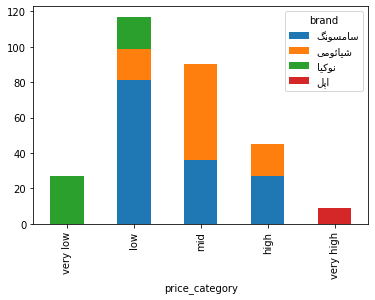

In [224]:
'''Enter your code here'''
data.groupby(['price_category', 'brand'])['brand'].count().unstack('brand').plot(kind='bar', stacked=True)
plt.show()

<hr />

💭 plot `Side-by-Side Boxplot` for price of phones with hard disk capacity of `64, 128 and 256`. (Your table should look like the one provided in the output cell)

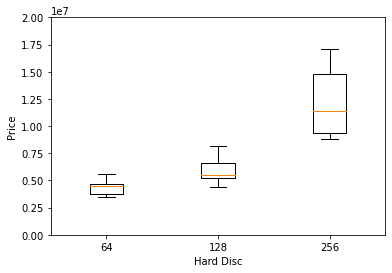

In [226]:
'''Enter your code here'''
plt.boxplot([data[data['hard disk'] == 64]['price'], data[data['hard disk'] == 128]['price'], 
             data[data['hard disk'] == 256]['price']])
plt.xticks([1, 2, 3], labels=[64, 128, 256])
plt.xlabel('Hard Disc')
plt.ylabel('Price')
plt.ylim(0, 1e7 * 2)
plt.show()


<hr />
<hr />

<span style="color:green">
    
- Get crawling! but always treat the data & its owners with respect. There are a number of online articles about ethics of crawling. Check them out if you are interested. :)  
    
- Also learning Selenium and Spyder libraries is recommended if you're interested in advanced crawling!

</span>


<hr />
<hr />

# Good Luck 😉

# More on crawling:
- An awesome free Persian <b><a  href=https://programming.tosinso.com/fa/videos/8506/%D8%AF%D9%88%D8%B1%D9%87-%D8%A2%D9%85%D9%88%D8%B2%D8%B4%DB%8C-%D8%B1%D8%A7%DB%8C%DA%AF%D8%A7%D9%86-Web-Scraping-%D8%A8%D8%A7-%D8%B2%D8%A8%D8%A7%D9%86-%D8%A8%D8%B1%D9%86%D8%A7%D9%85%D9%87-%D9%86%D9%88%DB%8C%D8%B3%DB%8C-%D9%BE%D8%A7%DB%8C%D8%AA%D9%88%D9%86 > course</a></b>. 